In [ ]:
!dir /content/drive/MyDrive/DogvsCat

dir: cannot access '/content/drive/MyDrive/DogvsCat': No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!dir /content/drive/MyDrive/DataSets/DogvsCat/dogvscat

test  train


In [ ]:
base_dir = r'/content/drive/MyDrive/DataSets/DogvsCat/dogvscat'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of test directory:")
print(os.listdir(f'{base_dir}/test'))



Contents of base directory:
['test', 'train']

Contents of train directory:
['0', '1']

Contents of test directory:
['0', '1']


In [ ]:
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')


# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, '0')
train_dogs_dir = os.path.join(train_dir, '1')

test_cats_dir = os.path.join(test_dir, '0')
test_dogs_dir = os.path.join(test_dir, '1')

In [ ]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['112.jpg', '100.jpg', '101.jpg', '10.jpg', '1.jpg', '107.jpg', '110.jpg', '11.jpg', '0.jpg', '105.jpg']
['10.jpg', '0.jpg', '1.jpg', '101.jpg', '100.jpg', '107.jpg', '103.jpg', '105.jpg', '109.jpg', '106.jpg']


In [ ]:
import plotly.graph_objects as go


# Count the number of images in each directory
train_cat_count = len(os.listdir(train_cats_dir))
train_dog_count = len(os.listdir(train_dogs_dir ))
test_cat_count = len(os.listdir(test_cats_dir))
test_dog_count = len(os.listdir(test_dogs_dir))

# Create a bar plot using Plotly
categories = ['Training','Test']
cats_counts = [train_cat_count, test_cat_count]
dogs_counts = [train_dog_count, test_dog_count]

fig = go.Figure(data=[
    go.Bar(name='Cats', x=categories, y=cats_counts),
    go.Bar(name='Dogs', x=categories, y=dogs_counts)
])

# Update the layout to add titles and labels
fig.update_layout(title='Distribution of Cat and Dog Images',
                  xaxis_title='Data Split',
                  yaxis_title='Number of Images')

fig.show()

In [ ]:
print('total training cat images :', train_cat_count)
print('total training dog images :', train_dog_count)



print('total test cat images :', test_cat_count)
print('total test dog images :', test_dog_count)

total training cat images : 250
total training dog images : 250
total test cat images : 25
total test dog images : 25


In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)


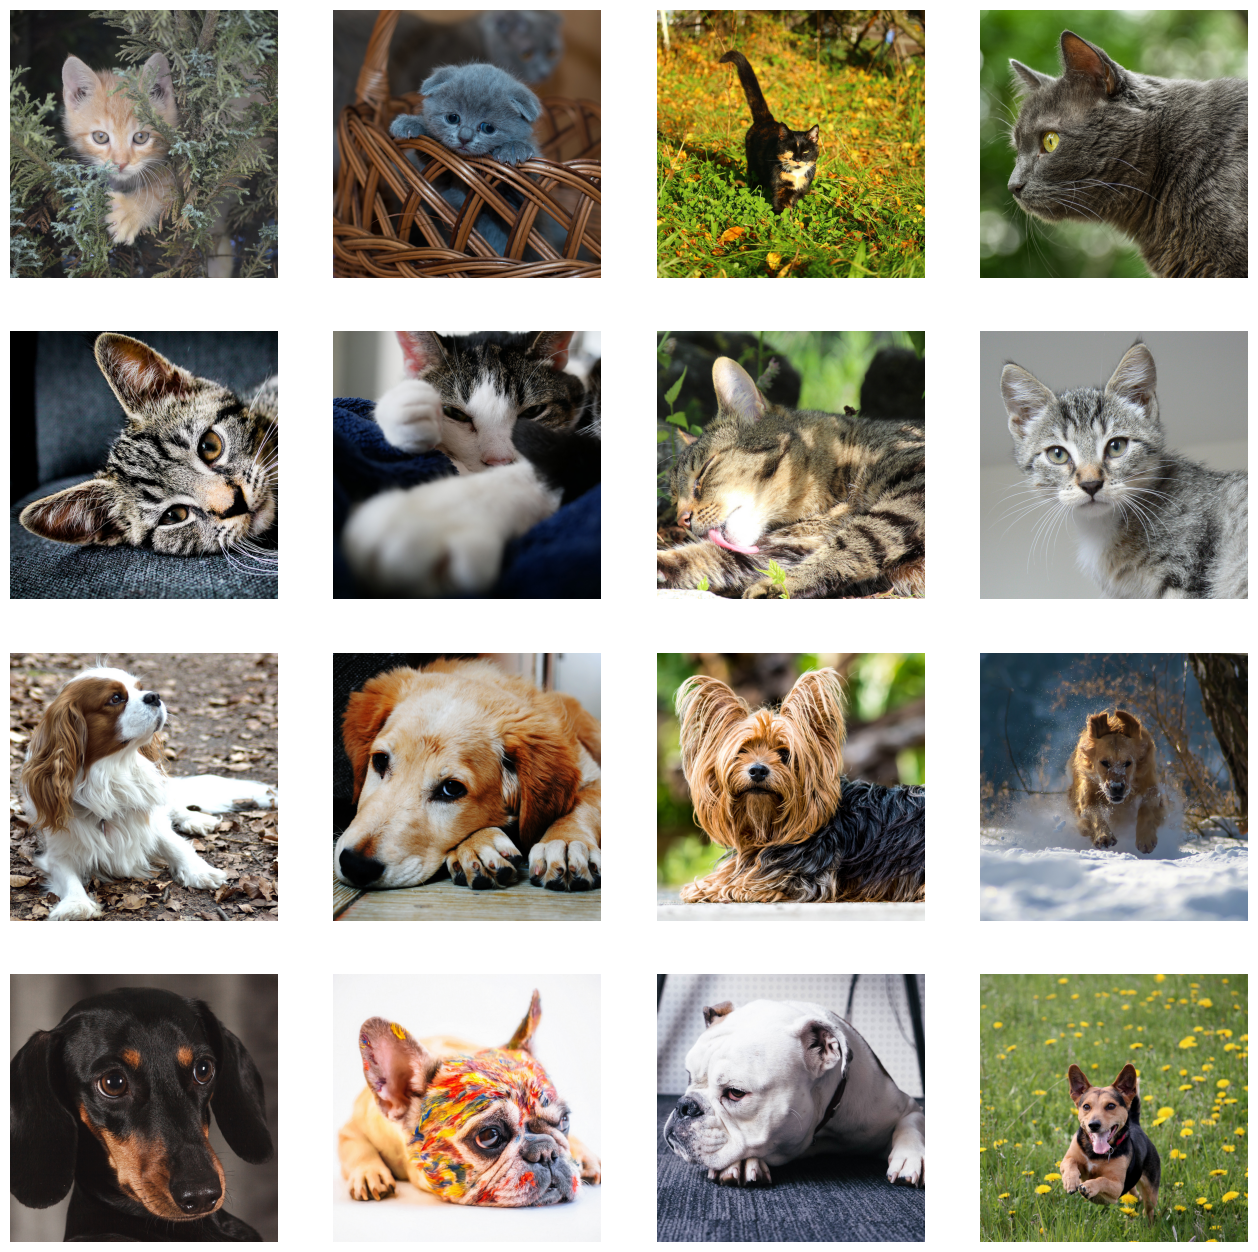

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index=0

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[ pic_index:pic_index+8]
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[ pic_index:pic_index+8]
               ]
sample_list=next_cat_pix+next_dog_pix
for i, img_path in enumerate(sample_list):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  print(img.shape)

plt.show()


In [ ]:
from PIL import Image
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
import os
import numpy as np
from PIL import Image

# Define the path to the main folder containing "cat" and "dog" subfolders


# Define the dimensions to which you want to resize the images
resize_width, resize_height = 100, 100

# Initialize lists to store image data and labels
data = []
labels = []

# Loop through the "cat" and "dog" subfolders
for category in os.listdir(train_dir):
    category_path = os.path.join(train_dir, category)
    label = 0 if category == '0' else 1  # Assign labels (0 for cats, 1 for dogs)

    for image_file in os.listdir(category_path):
        image_path = os.path.join(category_path, image_file)

        # Load and preprocess the image
        image = Image.open(image_path)
        image = image.resize((resize_width, resize_height))

        # Flatten the image into a 1D array
        image_data = np.array(image).flatten()

        # Append the flattened image and label to the data and labels lists
        data.append(image_data)
        labels.append(label)

# Convert lists to numpy arrays for easier handling
data = np.array(data)
labels = np.array(labels)
print(len(data))

500


In [ ]:
data

array([[ 41,  45,  38, ...,  70,  65,  60],
       [ 66,  62,  61, ..., 133,  88,  57],
       [184, 166, 130, ..., 102, 136,  20],
       ...,
       [ 35,  30,  31, ...,  69,  71,  78],
       [241, 241, 241, ..., 241, 241, 243],
       [ 20,  36,   9, ..., 164, 178, 184]], dtype=uint8)

In [ ]:
X=data
y=labels

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k=1
while k<25:

    knn = KNeighborsClassifier(n_neighbors=k)  # Choose the number of neighbors (k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}, k:{k}')
    k=k+1

Accuracy: 0.53, k:1
Accuracy: 0.47, k:2
Accuracy: 0.47, k:3
Accuracy: 0.47, k:4
Accuracy: 0.44, k:5
Accuracy: 0.47, k:6
Accuracy: 0.46, k:7
Accuracy: 0.45, k:8
Accuracy: 0.46, k:9
Accuracy: 0.46, k:10
Accuracy: 0.45, k:11
Accuracy: 0.45, k:12
Accuracy: 0.45, k:13
Accuracy: 0.45, k:14
Accuracy: 0.46, k:15
Accuracy: 0.48, k:16
Accuracy: 0.47, k:17
Accuracy: 0.49, k:18
Accuracy: 0.46, k:19
Accuracy: 0.45, k:20
Accuracy: 0.44, k:21
Accuracy: 0.47, k:22
Accuracy: 0.48, k:23
Accuracy: 0.46, k:24


In [ ]:
import os
import numpy as np
from PIL import Image

# Define the path to the main folder containing "cat" and "dog" subfolders


# Define the dimensions to which you want to resize the images
resize_width, resize_height = 100, 100

# Initialize lists to store image data and labels
test_data = []
test_labels = []

# Loop through the "cat" and "dog" subfolders
for category in os.listdir(test_dir):
    category_path = os.path.join(test_dir, category)
    label = 0 if category == '0' else 1  # Assign labels (0 for cats, 1 for dogs)

    for image_file in os.listdir(category_path):
        image_path = os.path.join(category_path, image_file)

        # Load and preprocess the image
        image = Image.open(image_path)
        image = image.resize((resize_width, resize_height))

        # Flatten the image into a 1D array
        image_data = np.array(image).flatten()

        # Append the flattened image and label to the data and labels lists
        test_data.append(image_data)
        test_labels.append(label)

# Convert lists to numpy arrays for easier handling
test_data = np.array(test_data)
test_labels = np.array(test_labels)
print(len(test_data))

50


In [ ]:
test_data

array([[ 37,  39,  33, ..., 106,  80,  68],
       [182, 199, 207, ...,  85,  84,  85],
       [224, 176, 126, ..., 166, 121, 106],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [ 38,  37,  38, ...,  68,  62,  59],
       [255, 255, 255, ..., 254, 254, 254]], dtype=uint8)

In [ ]:
X_train=data
y_train=labels
X_test=test_data
y_test=test_labels

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
k=1
while k<50:

      # Step 5: Create a k-NN classifier
      knn_classifier = KNeighborsClassifier(n_neighbors=k)

      # Step 6: Train the k-NN classifier
      knn_classifier.fit(X_train, y_train)

      # Step 7: Make predictions on the test set
      y_pred = knn_classifier.predict(X_test)



      # Step 8: Evaluate the performance of the model
      accuracy = accuracy_score(y_test, y_pred)
      print(f'Accuracy: {accuracy * 100:.2f}%, k:{k}')
      k=k+1

Accuracy: 58.00%, k:1
Accuracy: 58.00%, k:2
Accuracy: 58.00%, k:3
Accuracy: 62.00%, k:4
Accuracy: 52.00%, k:5
Accuracy: 52.00%, k:6
Accuracy: 54.00%, k:7
Accuracy: 58.00%, k:8
Accuracy: 64.00%, k:9
Accuracy: 62.00%, k:10
Accuracy: 64.00%, k:11
Accuracy: 62.00%, k:12
Accuracy: 64.00%, k:13
Accuracy: 60.00%, k:14
Accuracy: 64.00%, k:15
Accuracy: 58.00%, k:16
Accuracy: 64.00%, k:17
Accuracy: 62.00%, k:18
Accuracy: 62.00%, k:19
Accuracy: 64.00%, k:20
Accuracy: 60.00%, k:21
Accuracy: 62.00%, k:22
Accuracy: 62.00%, k:23
Accuracy: 64.00%, k:24
Accuracy: 62.00%, k:25
Accuracy: 62.00%, k:26
Accuracy: 62.00%, k:27
Accuracy: 62.00%, k:28
Accuracy: 64.00%, k:29
Accuracy: 60.00%, k:30
Accuracy: 60.00%, k:31
Accuracy: 60.00%, k:32
Accuracy: 60.00%, k:33
Accuracy: 58.00%, k:34
Accuracy: 58.00%, k:35
Accuracy: 56.00%, k:36
Accuracy: 56.00%, k:37
Accuracy: 56.00%, k:38
Accuracy: 58.00%, k:39
Accuracy: 58.00%, k:40
Accuracy: 56.00%, k:41
Accuracy: 56.00%, k:42
Accuracy: 56.00%, k:43
Accuracy: 54.00%, k:

In [ ]:
cat_test_path=r'/content/drive/MyDrive/DataSets/cat_test.jpg'
cat_image_path=cat_test_path

        # Load and preprocess the image
cat_image = Image.open(cat_image_path)
cat_image = cat_image.resize((resize_width, resize_height))

        # Flatten the image into a 1D array
cat_image_data = np.array(cat_image).flatten().reshape(1, -1)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)  # Load your trained model with the appropriate value of k
knn.fit(X_train, y_train)
prediction = knn.predict(cat_image_data)
if prediction == 0:
    print("The image is a cat.")
else:
    print("The image is a dog.")


The image is a dog.


In [ ]:
dog_test_path=r'/content/drive/MyDrive/DataSets/dog_test.jpeg'
dog_image_path=dog_test_path

        # Load and preprocess the image
dog_image = Image.open(dog_image_path)
dog_image = dog_image.resize((resize_width, resize_height))

        # Flatten the image into a 1D array
dog_image_data = np.array(dog_image).flatten().reshape(1, -1)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20)  # Load your trained model with the appropriate value of k
knn.fit(X_train, y_train)
prediction = knn.predict(dog_image_data)
if prediction == 0:
    print("The image is a cat.")
else:
    print("The image is a dog.")

The image is a cat.
